<a href="https://colab.research.google.com/github/sarahdell/DSPS_SDellorco/blob/main/hw2/Dellorco_CentralLimitTheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total),
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For distribution plot the sample mean of each sample (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
-  Extra Credit (required for 661 students): FIT a gaussian to the distribution of means. i.e. to the height of the bins if a histogram of sample means           

In [ ]:
from __future__ import print_function
__author__= 'fbb'
__editor__='skd'

import pylab as pl
import scipy as sp
import numpy as np

%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use

In [ ]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which *population* mean to give it (it will be the same for each distribution)

In [ ]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this!

![1](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq1.png)

![2](https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW2/chisq2.png)

For chi2 the parameter is *k* degrees of freedom. the mean is mean=*k*, the variance is 2*k*

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare

In class I used scipy.stats. You are free to use what you want!



In [ ]:
# the chi sq distribution takes the number of degrees of freedom,
# which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful! But youn can do this however you want

Lets start by looking at a single chi sq distribution of 100 elements

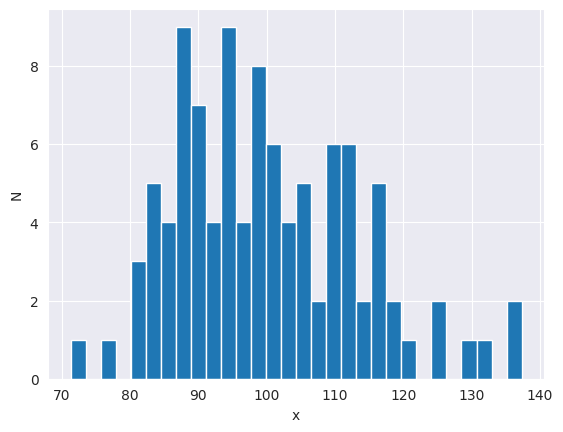

In [ ]:
# Note: I am adding imports here, to show the workflow:
# at this point I realize what packages I need and I import them.
# but this is a PEP8 violation.
# It is a good habit to put the includes at the top
# so the code fails right away if the packages are missing.
# Otherwise a user may have a piece of code running for a long time,
# and then fail when the package cannot be imported...
# (unless they are only imported under conditions, e.g. in an if statement)

np.random.seed(456) #This is done for reproducibility.
# prepare a container for all the distribution:
# a dictionary so you can call each family of distribution by "key"
mydists = {}
# mydists is an empty disctionary;
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
mydists['chisq'] = {}
# mydists['chisq'] is an element of the mydist dictionary, itself a dictionary
mydists['chisq'][100] = np.random.chisquare(mymean, size=100)
# mydists now is a dictionary with one object in it:
#             a dictionary by the key 'chisq'
# mydists['chisq'] is a dictionary with one object in it:
#             an array of 100 elements by the key 100
pl.hist(mydists['chisq'][100], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom.

## let numpy calculate what the mean and stdev of this distribution are

In [ ]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(mydists['chisq'][100].mean(), mydists['chisq'][100].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we discussed in class). Here are some tricks to create the distribution sizes. But you do not lave to do it like this. You do you, just make it work.

In [ ]:
#mysize = (np.random.rand(100) * 1000).astype(int)
#mysize = (2000 / (np.array(range(1, 101)))).astype(int)
#mysize = (1000 / (np.array(np.arange(1, 101) + [10]))).astype(int)
mysize = np.logspace(1, 3.3, 100, base=10).astype(int)
print ("shape of the 'size' list that contains the size of each distribution",
       mysize.shape)

shape of the 'size' list that contains the size of each distribution (100,)


Text(0, 0.5, 'frequency')

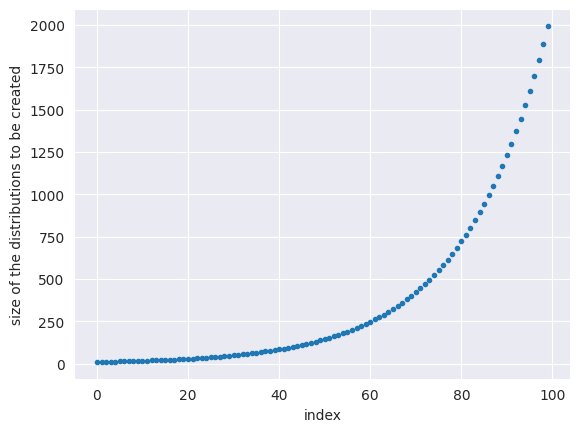

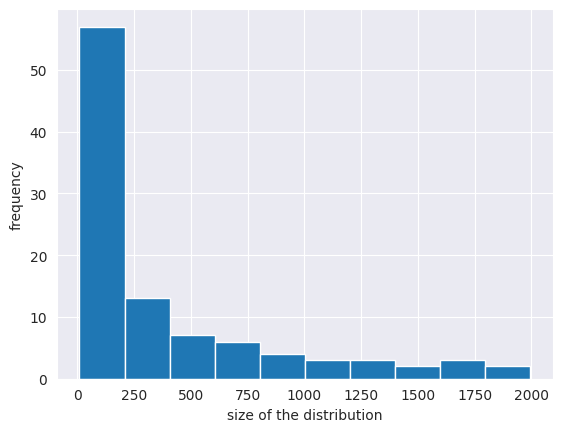

In [ ]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the distributions to be created");

pl.figure()
pl.hist(mysize)
pl.xlabel("size of the distribution")
pl.ylabel("frequency")


Figure 2: scatter plot and distribution of sample sizes for 100 samples to be created (note, the current choice does not produce more small then large distribution, which is desirable)

In [ ]:
mysize

array([  10,   10,   11,   11,   12,   13,   13,   14,   15,   16,   17,
         18,   19,   20,   21,   22,   23,   24,   26,   27,   29,   30,
         32,   34,   36,   38,   40,   42,   44,   47,   49,   52,   55,
         58,   61,   65,   68,   72,   76,   80,   84,   89,   94,   99,
        105,  111,  117,  123,  130,  137,  145,  153,  161,  170,  179,
        189,  199,  210,  222,  234,  247,  261,  275,  290,  306,  323,
        341,  360,  380,  400,  422,  446,  470,  496,  523,  552,  582,
        615,  648,  684,  722,  761,  803,  847,  894,  943,  995, 1050,
       1107, 1168, 1232, 1300, 1372, 1447, 1526, 1610, 1699, 1792, 1891,
       1995])

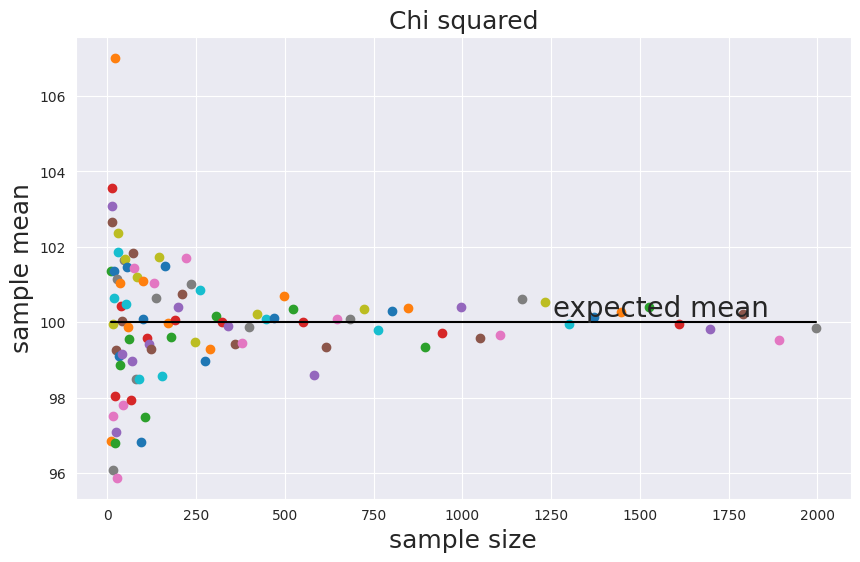

In [ ]:

# fill dictionary in in a for loop. not pythonic, but easily readable

for n in mysize:
  mydists['chisq'][n] = np.random.chisquare(df, size = n) #all distributions have mean=df=100

# save the means for plotting later

mydists['chisq']['means'] = {}
# prepare the figure
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in mydists['chisq']:
    if not type(nn) == str: # needed because one element is "mean"
        mydists['chisq']['means'][nn] = mydists['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, mydists['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
axchisq_mu_n.set_title('Chi squared', fontsize=18)
axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

### Figure 2: As the sample size increases (approaches the size of the population), the sample mean approaches the population mean. This is Central Limit Theorem.

# now the histogram of the mean of all samples:
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

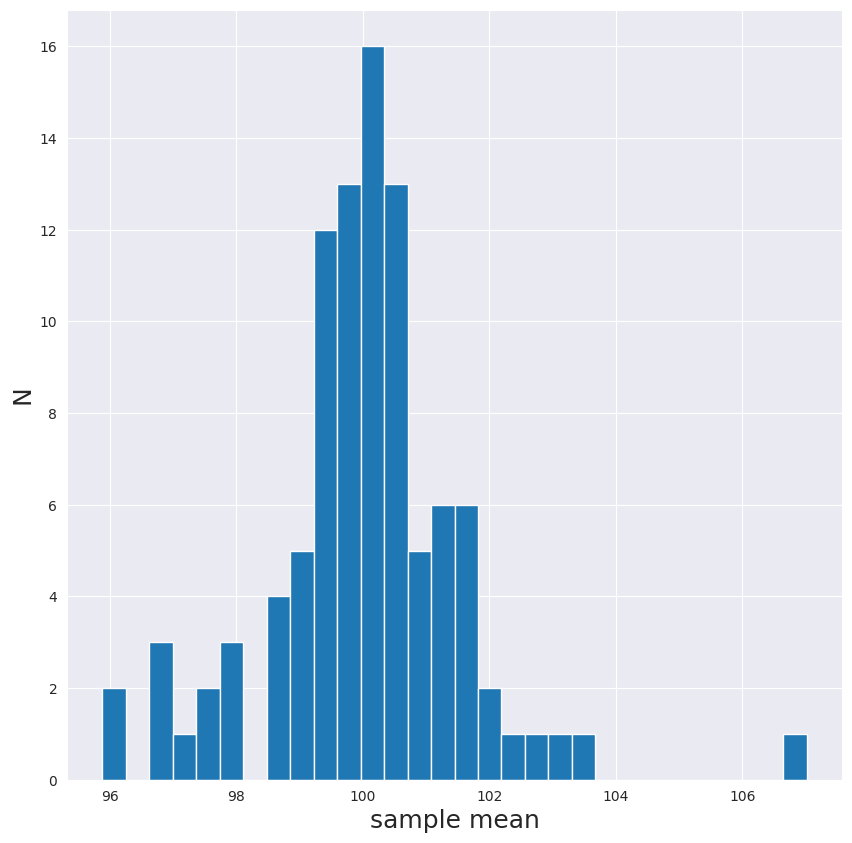

In [ ]:
allmeans = list(mydists['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);



```
# This is formatted as code
```

## Figure 3: The plot is counting the frequency of the mean of the 100 random distributions and placing them in the range bin. As expected, since the expected mean, or the population mean, is 100, the two bins with the boundary of 100 have the largest frequency.

# Do it for the Normal distribution


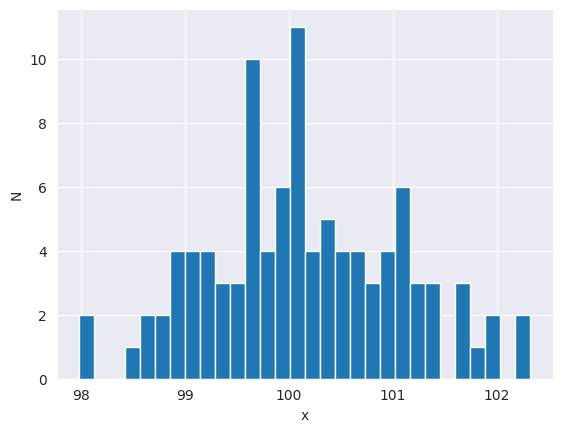

In [ ]:
np.random.seed(456)
normaldist=np.random.normal(mymean,scale=1, size=100)
pl.hist(normaldist, bins = 30)
pl.ylabel('N')
pl.xlabel('x');

Figure 4: Normal distribution of a sample of size 100, mean of 100, and a standard deviation of 1.

In [ ]:
print (f"Normal mean: {(normaldist.mean()):.2f}, standard deviation: {(normaldist.std()):.2f}")

Normal mean: 100.14, standard deviation: 0.92


In [ ]:
normalarray=[]
normalmeans=[]
for i in range(len(mysize)):
  norm=np.random.normal(mymean, scale=1, size=mysize[i])
  mean=np.mean(norm)
  normalarray.append(norm)
  normalmeans.append(mean)


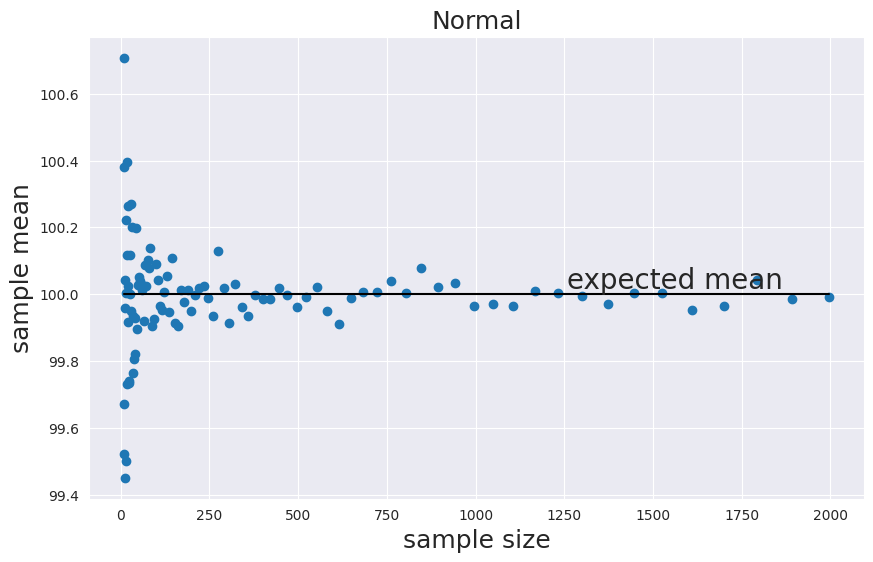

In [ ]:
normplot = pl.figure(figsize=(10,6)).add_subplot(111)
pl.scatter(mysize,normalmeans)
normplot.set_xlabel('sample size', fontsize=18)
normplot.set_ylabel('sample mean', fontsize=18)
normplot.set_title('Normal', fontsize=18)
normplot.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
normplot.text(normplot.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

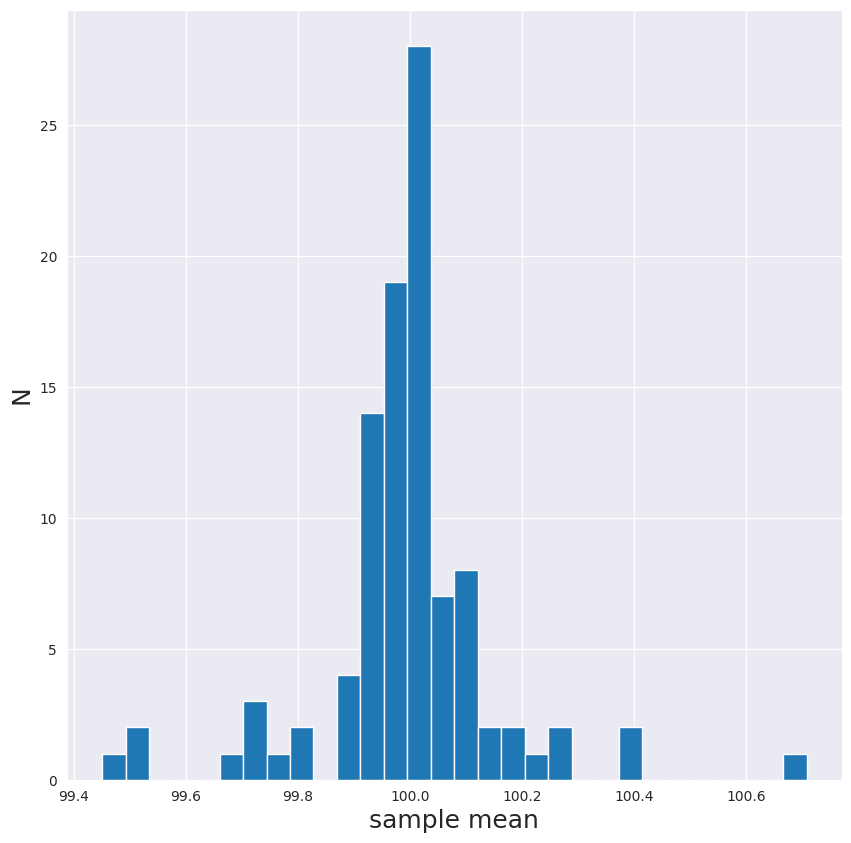

In [ ]:
pl.figure(figsize=(10, 10))
pl.hist(normalmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

# Do it for the Poisson distribution

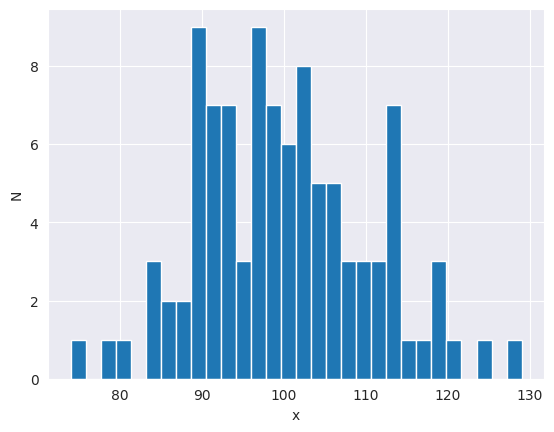

In [ ]:
np.random.seed(456)
poissondist=np.random.poisson(lam=mymean, size=100)
pl.hist(poissondist, bins = 30)
pl.ylabel('N')
pl.xlabel('x');

In [ ]:
print (f"Poisson mean: {(poissondist.mean()):.2f}, standard deviation: {(poissondist.std()):.2f}")

Poisson mean: 99.90, standard deviation: 10.46


In [ ]:
poissonarray=[]
poissonmeans=[]
for i in range(len(mysize)):
  pois=np.random.poisson(lam=mymean, size=mysize[i])
  mean=np.mean(pois)
  poissonarray.append(pois)
  poissonmeans.append(mean)

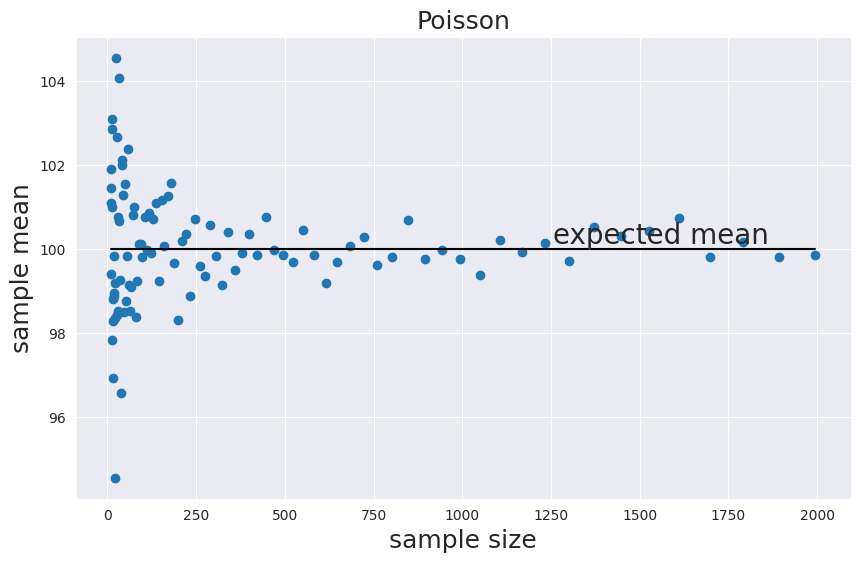

In [ ]:
poisplot = pl.figure(figsize=(10,6)).add_subplot(111)
pl.scatter(mysize,poissonmeans)
poisplot.set_xlabel('sample size', fontsize=18)
poisplot.set_ylabel('sample mean', fontsize=18)
poisplot.set_title('Poisson', fontsize=18)
poisplot.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
poisplot.text(poisplot.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

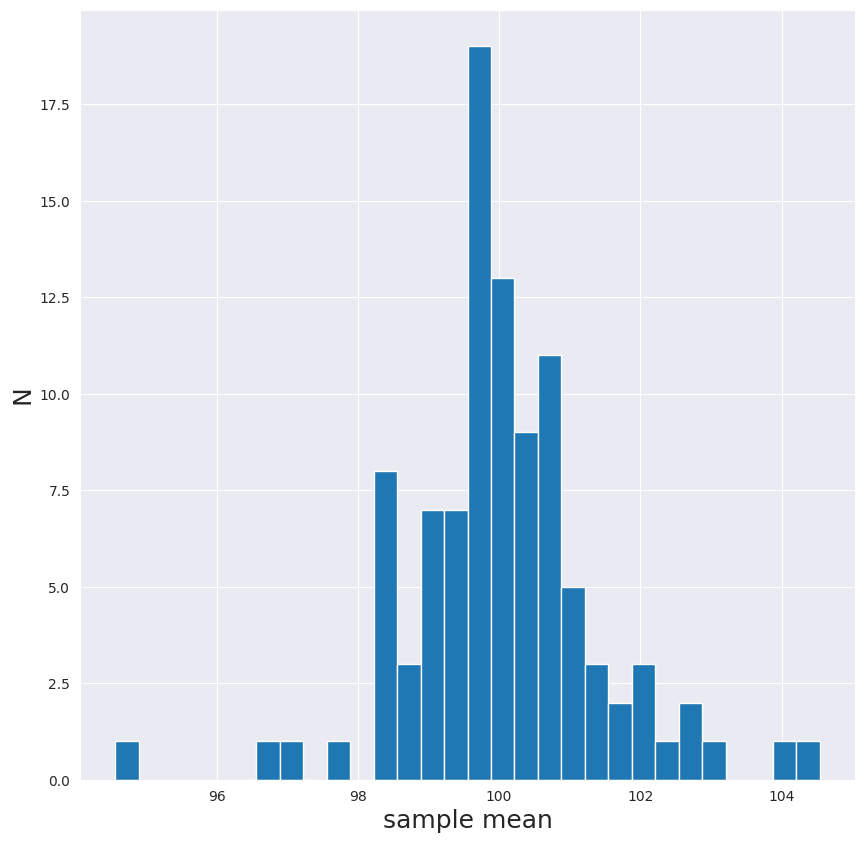

In [ ]:
pl.figure(figsize=(10, 10))
pl.hist(poissonmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

# Do it for the Binomial distribution

In [ ]:
np.random.seed(456)
binomialarray=[]
binomialmeans=[]
for i in range(len(mysize)):
  binom=np.random.binomial(n=200, p=0.5, size=mysize[i])
  mean=np.mean(binom)
  binomialarray.append(binom)
  binomialmeans.append(mean)

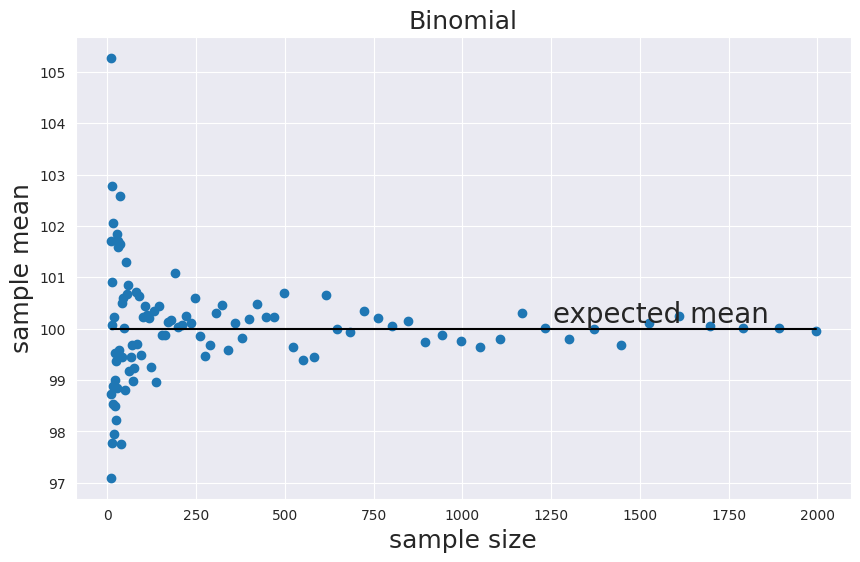

In [ ]:
binomplot = pl.figure(figsize=(10,6)).add_subplot(111)
pl.scatter(mysize,binomialmeans)
binomplot.set_xlabel('sample size', fontsize=18)
binomplot.set_ylabel('sample mean', fontsize=18)
binomplot.set_title('Binomial', fontsize=18)
binomplot.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
binomplot.text(binomplot.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

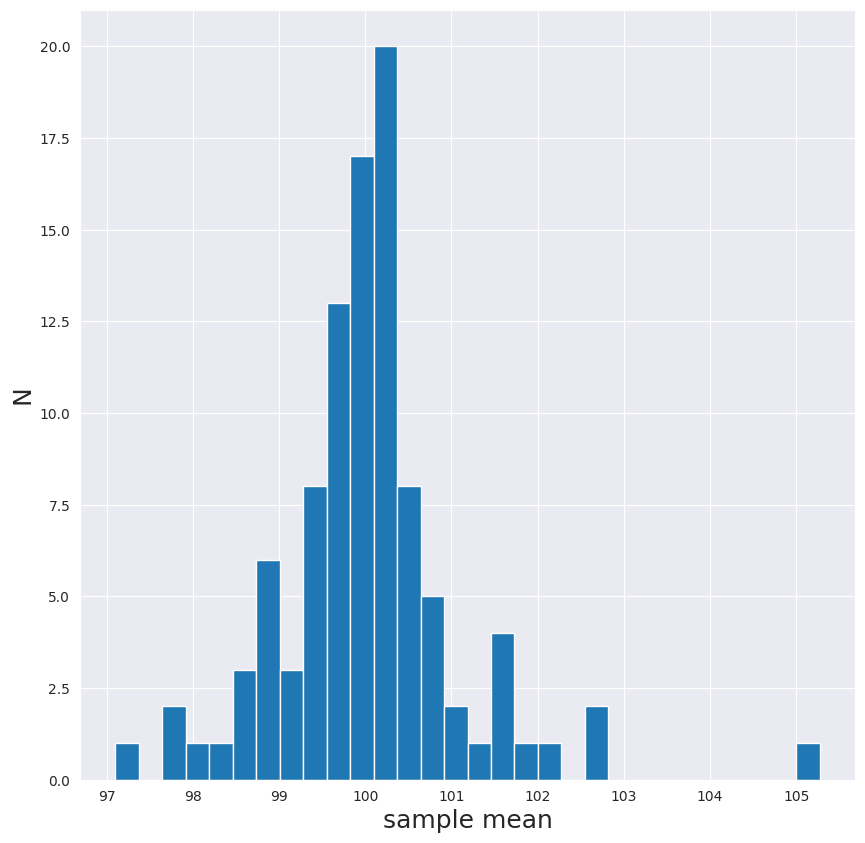

In [ ]:
pl.figure(figsize=(10, 10))
pl.hist(binomialmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

# Do it for another distribution-Cauchy

In [ ]:
np.random.seed(456)
cauchyarray=[]
cauchymeans=[]
for i in range(len(mysize)):
  cauchy=sp.stats.cauchy.rvs(loc=100, size=mysize[i])
  mean=np.mean(cauchy)
  cauchyarray.append(cauchy)
  cauchymeans.append(mean)

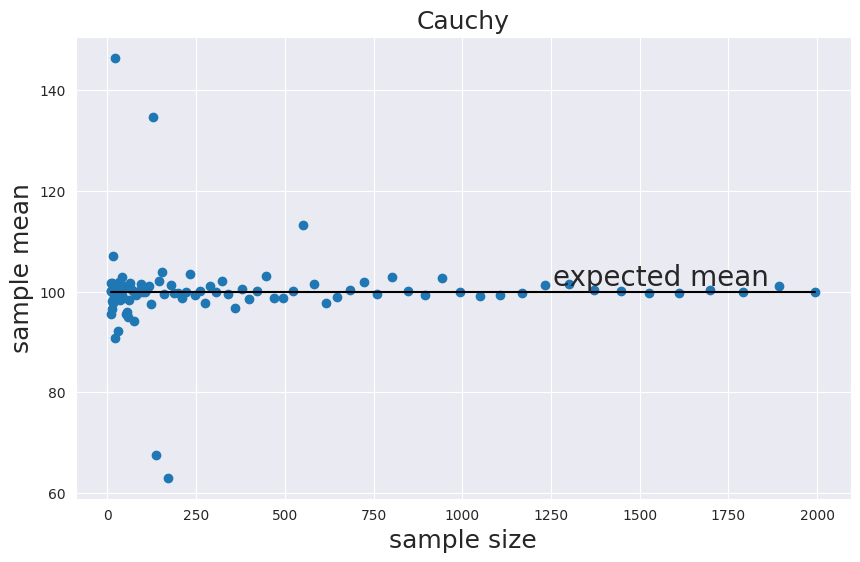

In [ ]:
cauchyplot = pl.figure(figsize=(10,6)).add_subplot(111)
pl.scatter(mysize,cauchymeans)
cauchyplot.set_xlabel('sample size', fontsize=18)
cauchyplot.set_ylabel('sample mean', fontsize=18)
cauchyplot.set_title('Cauchy', fontsize=18)
cauchyplot.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
cauchyplot.text(cauchyplot.get_xlim()[1] * .6, 100, "expected mean",
                  va="bottom", fontsize=20);

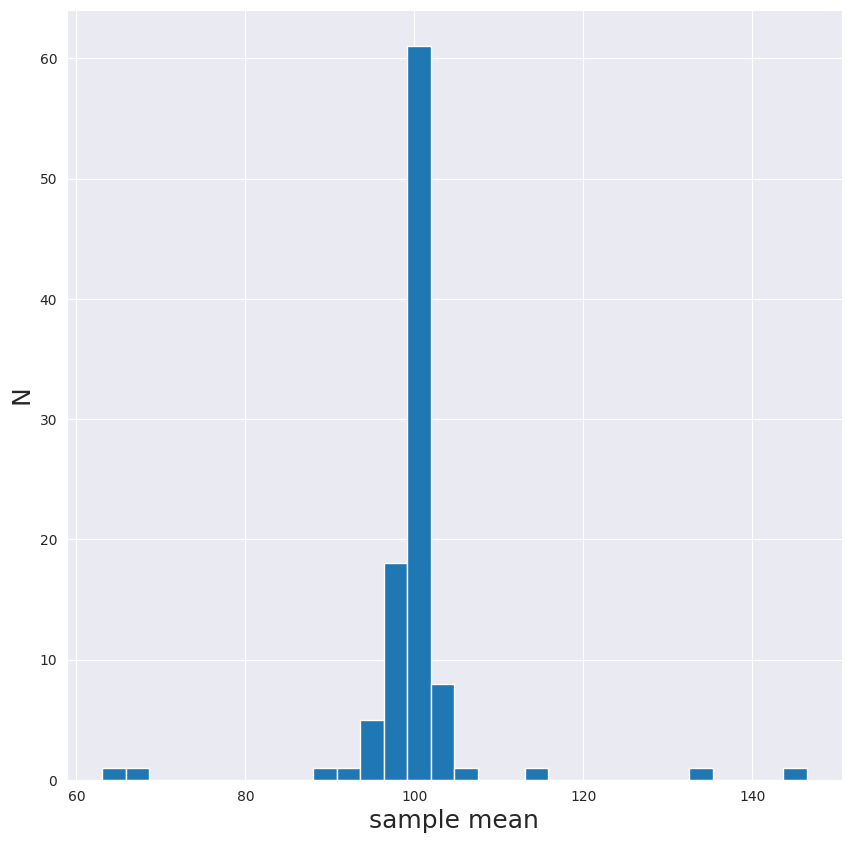

In [ ]:
pl.figure(figsize=(10, 10))
pl.hist(cauchymeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18);

# 661 students: fita  a Gaussian to the histogram of the means for each distribution

# Extra Credit for 461

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the height of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram.
(be careful that the x axis and the y axis are not the same size when you extract them from the pl.hist function cause the x represents the **edges** while what you want is the **centers** of each bin

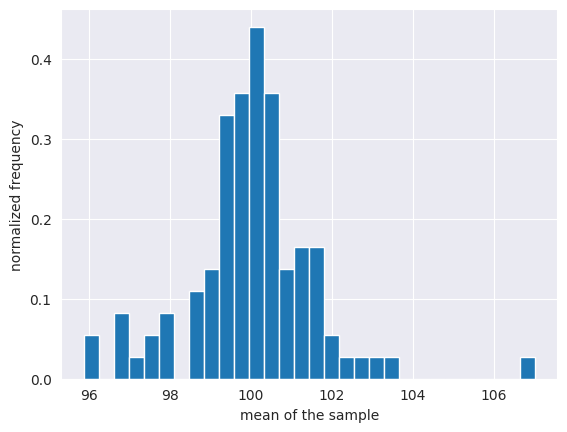

In [ ]:
height, bins, patch  = pl.hist(allmeans,bins=30, density=True)
pl.xlabel("mean of the sample")
pl.ylabel("normalized frequency");

And you can create your own Gaussian function to pass to curve_fit as this for example:

In [ ]:
# def gaussian(x, mu, sigma): # this is the gaussian you will fit
#   '''
#   Takes an input mean mu and a standard deviation sigma and creates a gaussian distribution (symmetric and centered at mu) based on those parameters using the g equation.
#   '''
#   g = 1 / np.sqrt(2 * pi) / sigma * np.exp(-(x - mu )**2 / 2/sigma**2)
#   return g
#   #we did not use the other function since we are using scipy.optimize.curve_fit. The other function might be necessary if we had used scipy.optimize.minimize

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

**You can do it by eye** (partial credit 0.5/1).

It would be better to do it programmatically. To fit the data you can use `scipy.minimize` or `scipy.optimize`

In [ ]:
#y, x = np.histogram(allmeans, bins=30, density=True)

In [ ]:
#pl.bar(x[:-1],y)

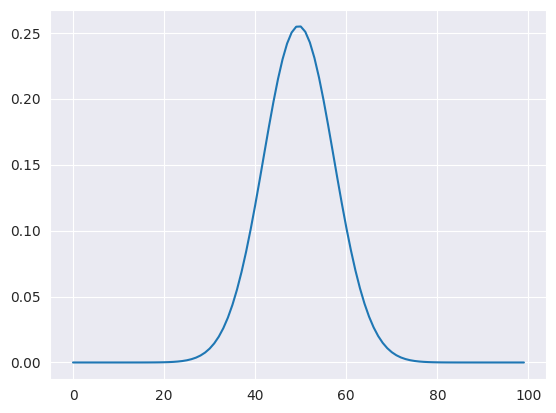

In [ ]:
#creating the gaussian
domain = np.linspace(90,110,100)
gauss=sp.stats.norm.pdf(domain, np.mean(allmeans), np.std(allmeans)) #creating a normal probability density function curve (Gaussian) from the mean of the array of allmeans and the std of allmeans
pl.plot(gauss)

Text(0, 0.5, 'normalized frequency')

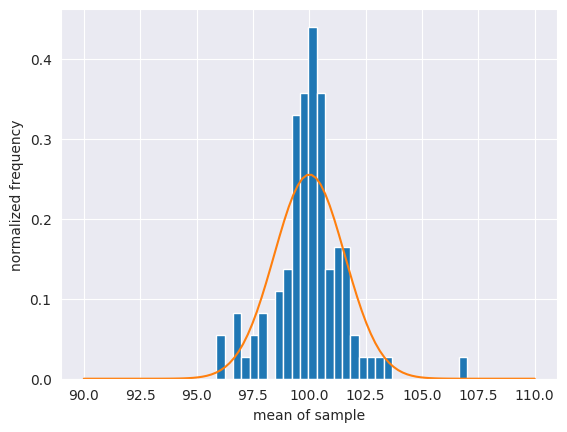

In [ ]:
#plotting the histogram with the Guassian curve from the previous cell
pl.hist(allmeans, bins = 30, density = True)
pl.plot(domain, gauss)
pl.xlabel("mean of sample")
pl.ylabel("normalized frequency")